<a href="https://colab.research.google.com/github/240803PALAK/240803PALAK/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:53<00:00, 22.2MB/s]
100% 1.06G/1.06G [00:53<00:00, 21.4MB/s]


In [6]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [15]:
#generator
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
#Normalize
def process(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [17]:
from keras.src.layers.serialization import activation
#CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 116ms/step - loss: 0.9557 - accuracy: 0.6502 - val_loss: 1.5233 - val_accuracy: 0.6214
Epoch 2/10
625/625 [==============================] - 72s 115ms/step - loss: 0.5303 - accuracy: 0.7480 - val_loss: 0.6501 - val_accuracy: 0.7130
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4457 - accuracy: 0.7940 - val_loss: 0.5648 - val_accuracy: 0.7480
Epoch 4/10
625/625 [==============================] - 81s 128ms/step - loss: 0.3601 - accuracy: 0.8406 - val_loss: 0.5029 - val_accuracy: 0.7774
Epoch 5/10
625/625 [==============================] - 77s 122ms/step - loss: 0.2743 - accuracy: 0.8839 - val_loss: 0.6266 - val_accuracy: 0.7956
Epoch 6/10
625/625 [==============================] - 89s 142ms/step - loss: 0.1895 - accuracy: 0.9252 - val_loss: 0.7014 - val_accuracy: 0.8042
Epoch 7/10
625/625 [==============================] - 72s 115ms/step - loss: 0.1170 - accuracy: 0.9556 - val_loss: 0.9308 - val_ac

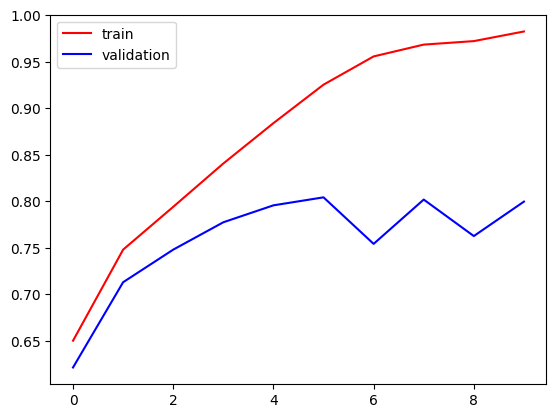

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

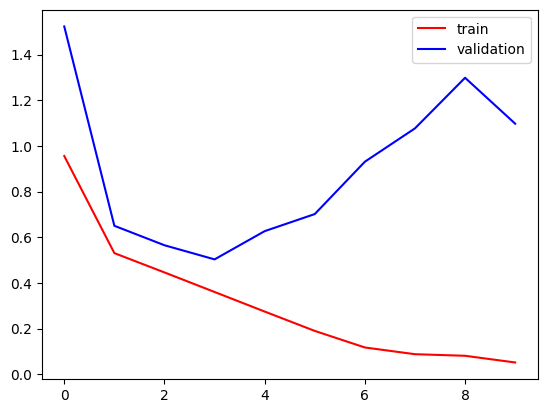

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [62]:
import cv2
test_img=cv2.imread('/content/dog.jpg')

In [63]:
test_img.shape

(159, 317, 3)

In [64]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape(1,256,256,3)

1/1 [==============================] - 0s 19ms/step
[[1.]]


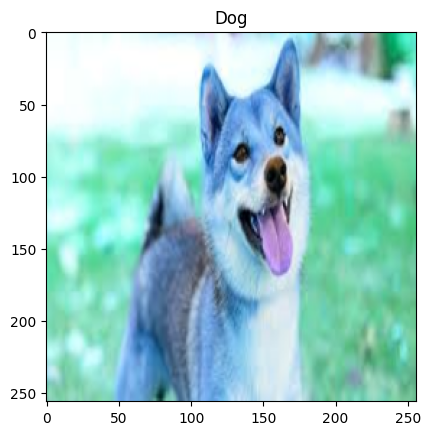

In [65]:
ans=model.predict(test_input)
print(ans)
if ans==[[0.]]:
  plt.imshow(test_img)
  plt.title("Cat")
else:
  plt.imshow(test_img)
  plt.title("Dog")